# TELCO TELECOMS

# Why do our customers churning ?

By Christian Freeman 2021-11-29

## Project Planning
* PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

Understanding consumer behavior can quite chanlenging,  especially when the product we offer our customers is a service rather than a tangible physical products. In the case of Telco, in order to have a clear picture of customer churn, I will perform the following:
- Acquire the telco data from using acquire.py.
- Prepare the data using prepare.py
- Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways
- Explore Data 
- Establish a baseline accuracy
- Model building and Evaluation
- Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
- Deliver pressentation, recommendations and next steps

### Goals and summary

My goal in this project is to: 
- Identify the characteristics of customers who are more likely to churn, and the potential reasons for this behavior.
- Build a ML model to predict customer churn
- So that recommendations are made based on the findings to help telco minimize the churn rate and maximize customer retention and revenue.
- Recommendations will be made based on the findings.
- I will be using Python, Pandas, Matplot, Seaborn, and Scikit-Learn libraries to analyse and create ML classification model.


### Initial Questions

- Which category of are customers are churning the most?
- Why are our customers churning ?
- Why are they staying ?
- can we predict churn?

### Hypothesis

- H0:  customer churn is independent of which payment type they use

- Ha:  customer churn has a dependent of which payment type they use 

- H0:  customer churn is independent of which contract type they have
- Ha:  customer churn has a dependent of which contract type they have

## Executive Summary
### Findings Include:
- some customers churn with low monthly charges and some stay with are monthly charges
- churners seem to have lower total charges
- higher monthly charge, lower tenure and lower total charges are linked to High churn rate
- no online security, no tech support, month to month contract, fiber  and first year subscribers increase churn
- recent customers are more likely to churn
- The Random Forest was chosen as the best model for prediction my target value, churn
- It had accuracy of 80% on the train set
 
- This model outperformed my baseline score of 73%
- The Random Forest model was successful in predicting churn accuracy on TEST data with an accuracy of 80%
- That is a higher than the baseline which was 73%.
### Next Steps to Explore Further:
- Run more models and change the hyperparameters on several different versions
- Send a survey to customers who churn to get insight directly from the customer
- Continue further with feature engineering to run models on different features
- Fine tune the model by aiming to improve recall to catch all those that churned

## Acquire data
- Plan ==> ACQUIRE ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

 

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize
from imblearn.combine import SMOTEENN
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import custom functions
import acquire as aqr
import prepare as prep
import explore as ex
import model

Build a predefine  function acquire.py to automate data acquisition.
Acquire telco data from the MYSQL database use SQL queries to join and read it into a dataframe


In [2]:
 # lets bring the telco dataset using our acquire.py function
raw_df = aqr.get_telco_data()

In [3]:
# lets look the brief summary description Including shape, info, columns names, and churn total count
# the telco_raw_summary() function  in the prepare.py is used here

raw_df = prep.telco_raw_summary(raw_df)

COLUMNS NAMES OF TELCO DATASET

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

THE SHAPE OF TELCO DATASET

The Telco dataset has 7043 rows and 24 columns

TELCO INFO AND DATA TYPES, NEEDS TO EXAMINE TOTAL CHARGES MORE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_t

## Data Preparation
- Plan ==> Acquire ==> PREPARE ==> Explore ==> Model & Evaluate ==> Deliver



- Build a predefine function prep_telco() in the prepare.py to automate data cleaning and does the following :
- examines the data for missing and null values
- cleans the data and decide of the variables that needs to be encoded
- Removes unneeded columns and duplicates, and renaming some columns
- Encodes variables as needed by converting string columns to numbers by creating dummy variables (encoding "Yes" and "No" values to 1s and 0s)
- Replaces total_charges empty cells with 0 due to tenure = 0  and converting type to float
- Creates dummy variables for 'gender', 'contract','internet', 'payment_type' and concating with dataframe
- add a column name tenure_group by grouping tenure in bins 12 representing a year


In [4]:
# lets bring in the clean data using the prep.prep_telco function in the prepare.py file
encoded_telco = prep.prep_telco()

In [5]:
encoded_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,Female,0,1,1,65,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,0,0,54,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,0,0,56,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,1,0,72,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [6]:
encoded_telco.shape

(7043, 33)

In [7]:
encoded_telco.describe()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,...,0.550192,0.209144,0.240664,0.343746,0.439585,0.216669,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,...,0.497510,0.406726,0.427517,0.474991,0.496372,0.412004,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Exploration & Analysis

- Plan ==> Acquire ==> Prepare ==> EXPLORE ==> Model & Evaluate ==> Deliver



### Train, Validate, Test

- Split the data to ready for exploration, modeling, and testing
- Using the prepare custom function, take in a DataFrame and return train, validate, and test DataFrames; 
- Stratify on churn


In [8]:
train , validate, test = prep.split_telco(encoded_telco)

train_encoded, shape: (3943, 33)
validate_encoded, shape: (1691, 33)
test_encoded, shape: (1409, 33)


In [9]:
# verify that our train dataset is a representation of the entire dataset


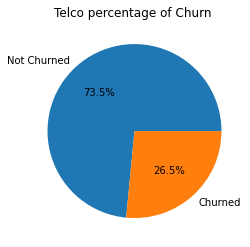

In [10]:
# overall churn visualization on raw data
df = aqr.get_telco_data()
prep.viz_churn(df)

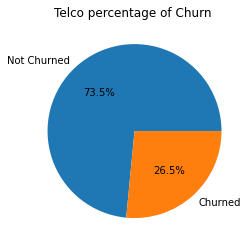

In [11]:
# overall churn visualization on train data
prep.viz_churn(train)

## Takeaway 
- The split worked correctly as we can see, the train data is a perfect representation on the raw data

### Visualize the Data


### Univariate Stats:


<Figure size 432x288 with 0 Axes>

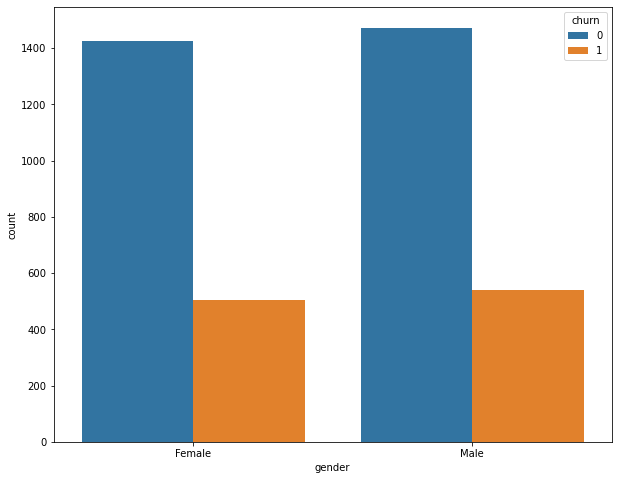

<Figure size 432x288 with 0 Axes>

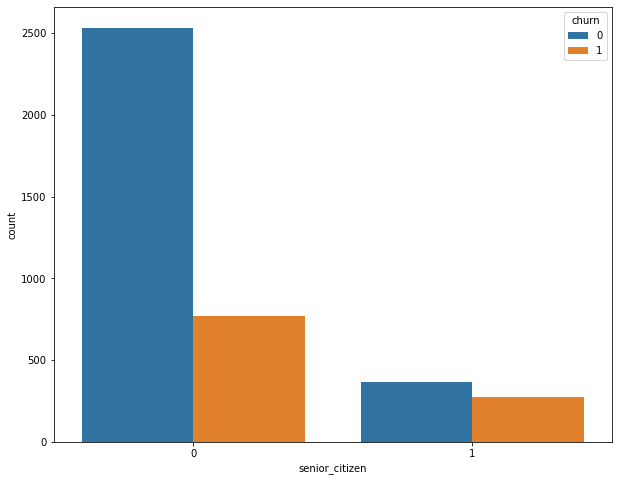

<Figure size 432x288 with 0 Axes>

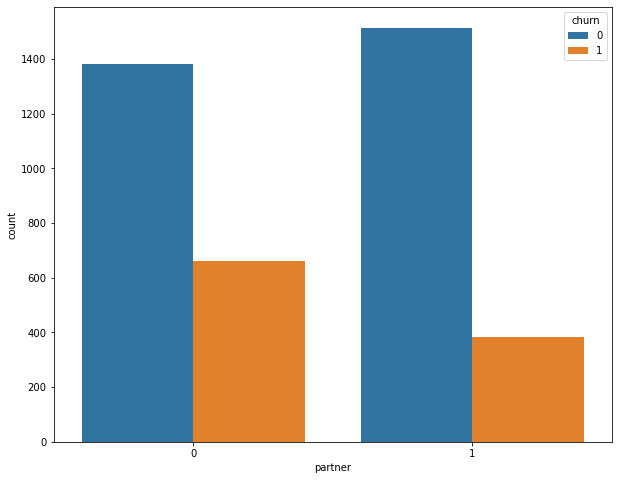

<Figure size 432x288 with 0 Axes>

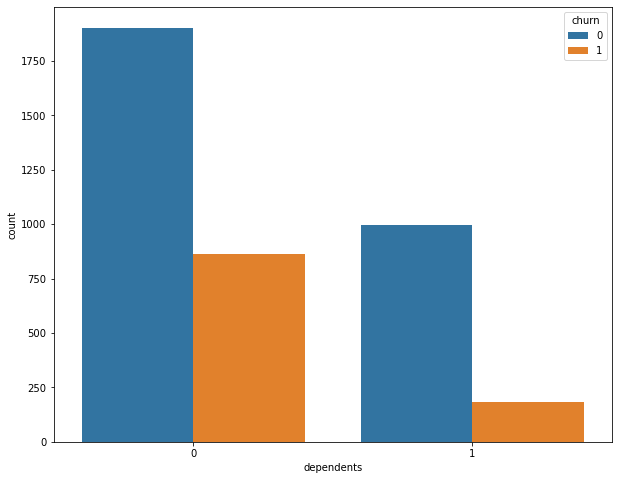

<Figure size 432x288 with 0 Axes>

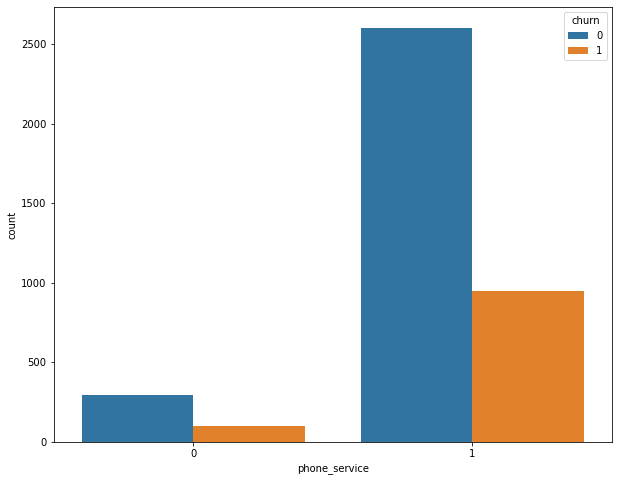

<Figure size 432x288 with 0 Axes>

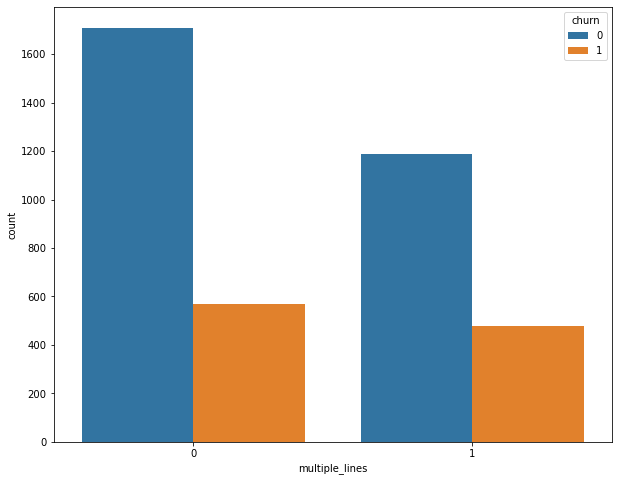

<Figure size 432x288 with 0 Axes>

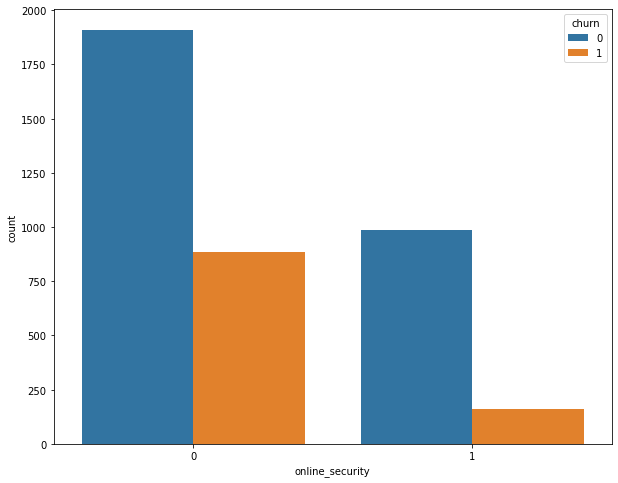

<Figure size 432x288 with 0 Axes>

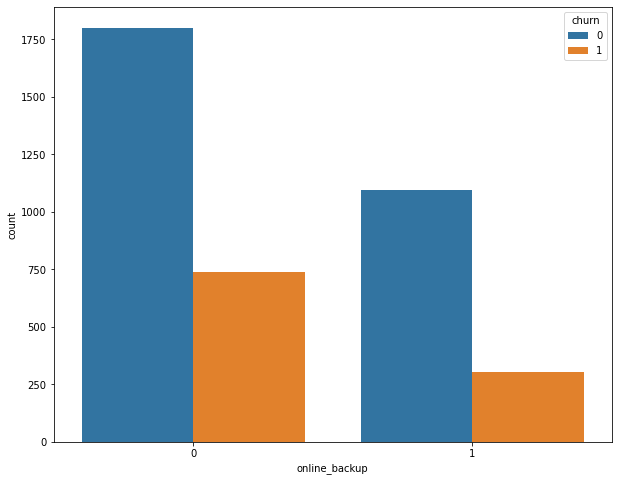

<Figure size 432x288 with 0 Axes>

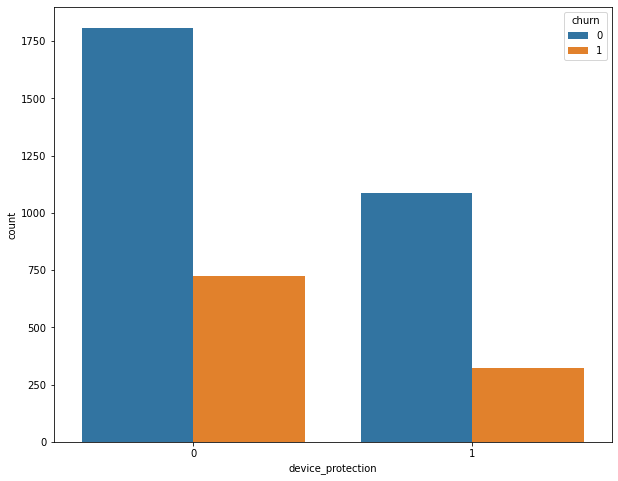

<Figure size 432x288 with 0 Axes>

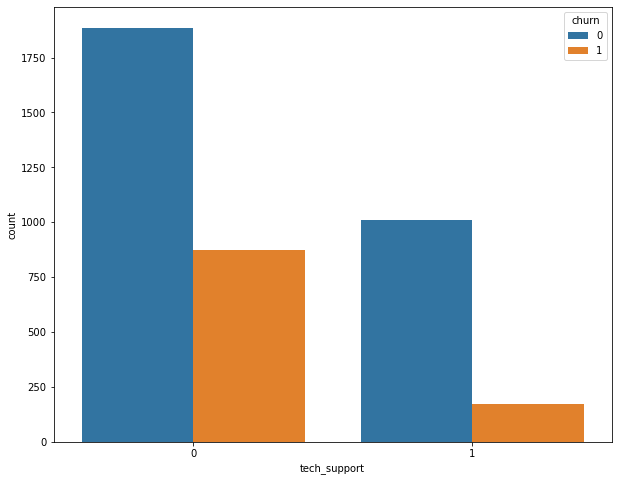

<Figure size 432x288 with 0 Axes>

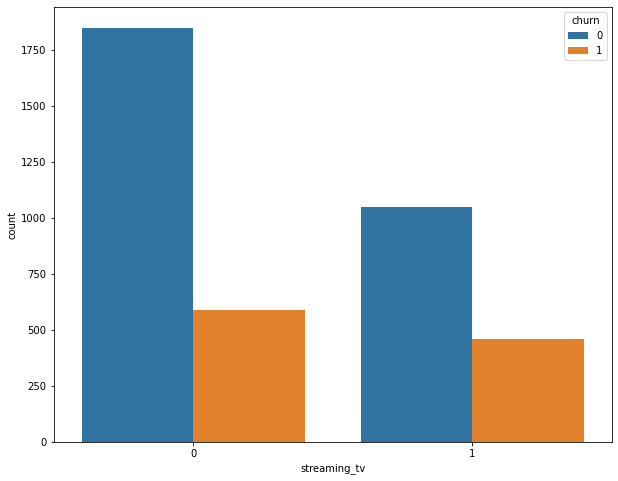

<Figure size 432x288 with 0 Axes>

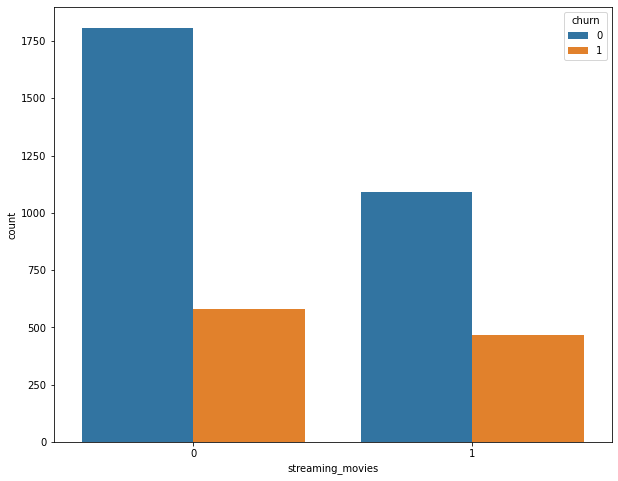

<Figure size 432x288 with 0 Axes>

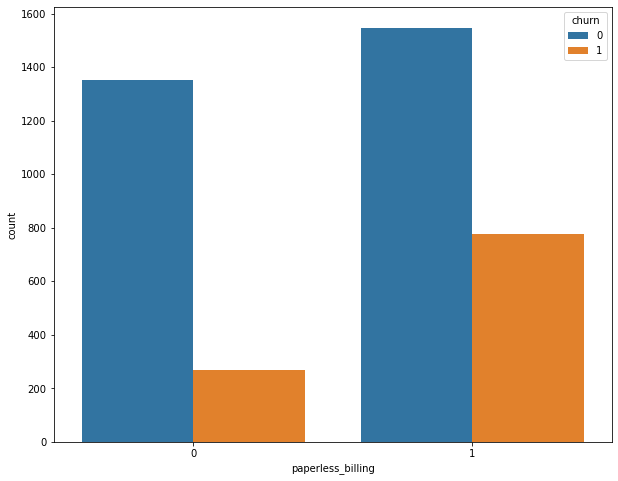

<Figure size 432x288 with 0 Axes>

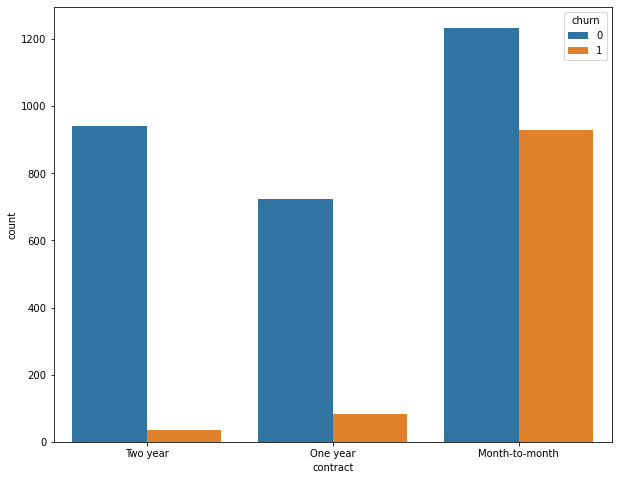

<Figure size 432x288 with 0 Axes>

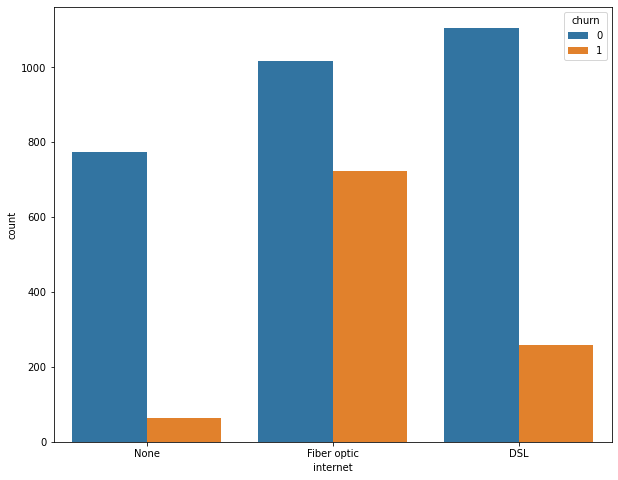

<Figure size 432x288 with 0 Axes>

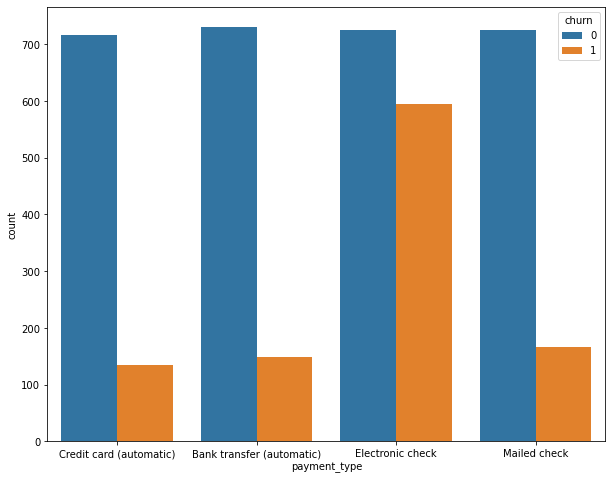

<Figure size 432x288 with 0 Axes>

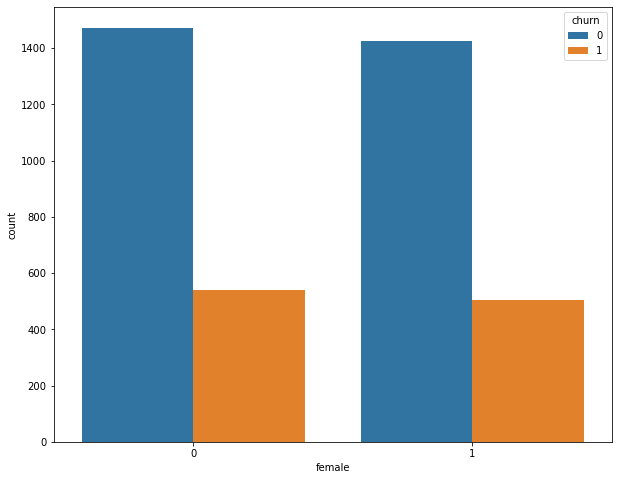

<Figure size 432x288 with 0 Axes>

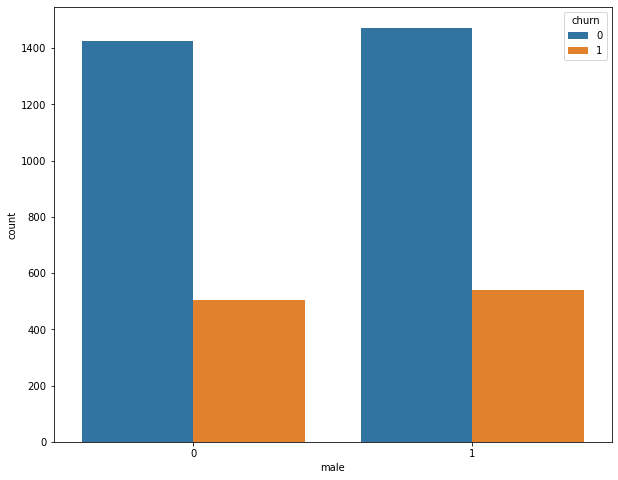

<Figure size 432x288 with 0 Axes>

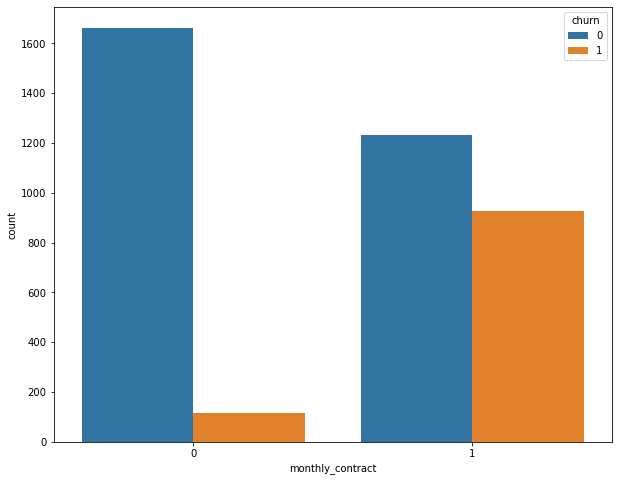

<Figure size 432x288 with 0 Axes>

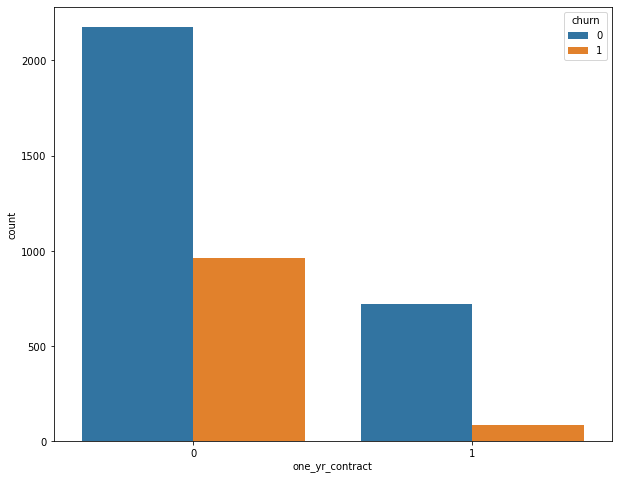

<Figure size 432x288 with 0 Axes>

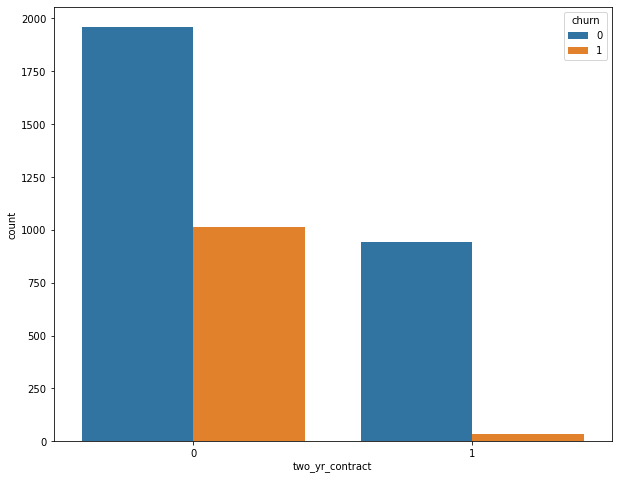

<Figure size 432x288 with 0 Axes>

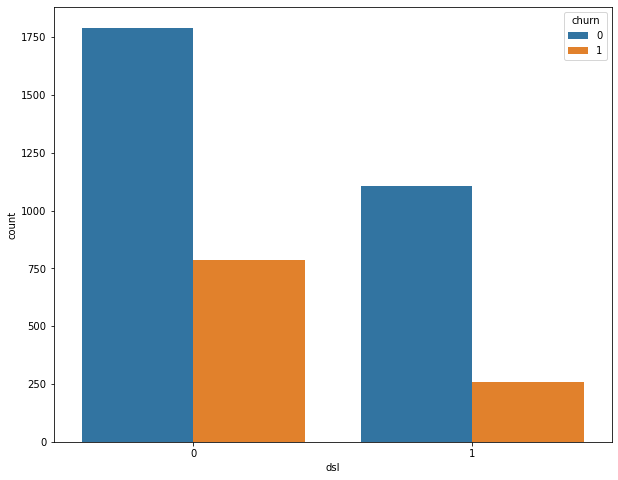

<Figure size 432x288 with 0 Axes>

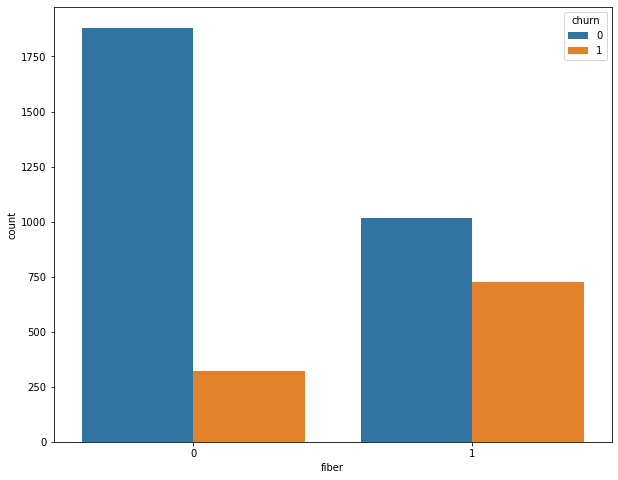

<Figure size 432x288 with 0 Axes>

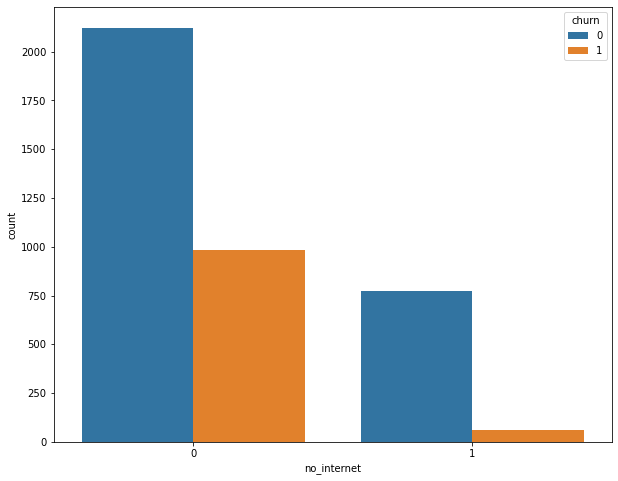

<Figure size 432x288 with 0 Axes>

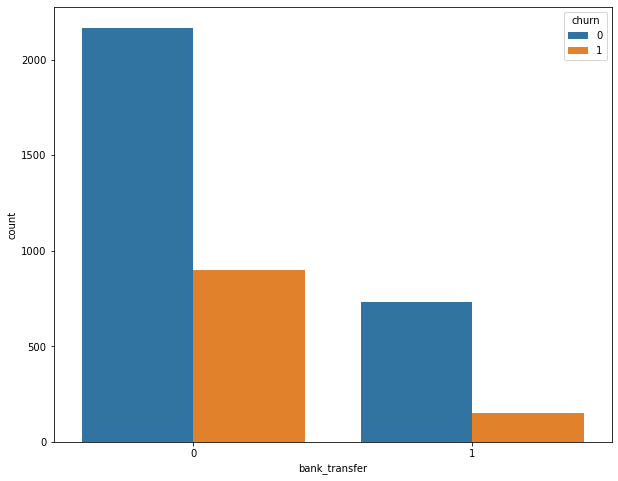

<Figure size 432x288 with 0 Axes>

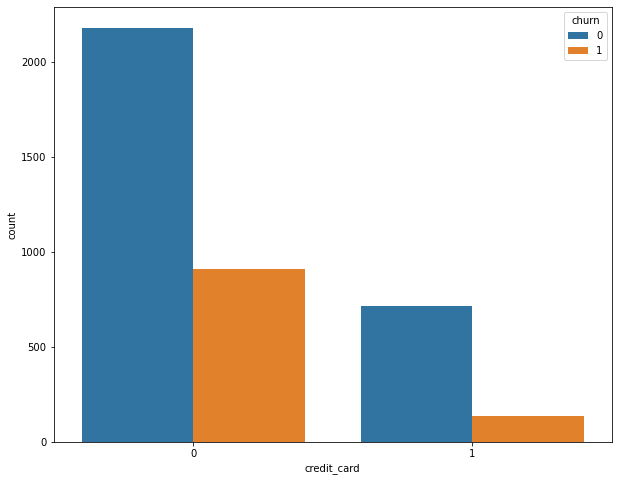

<Figure size 432x288 with 0 Axes>

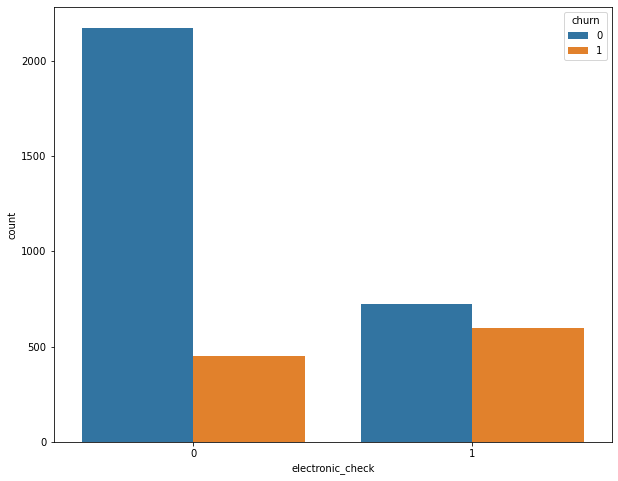

<Figure size 432x288 with 0 Axes>

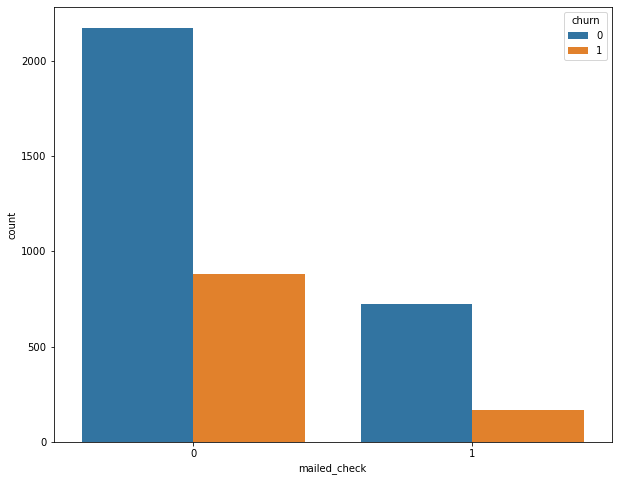

<function explore.univariate_analysis(df)>

In [12]:
# call our predefined function for univariate analysis on train data
# categotical variable
ex.univariate_analysis(train)

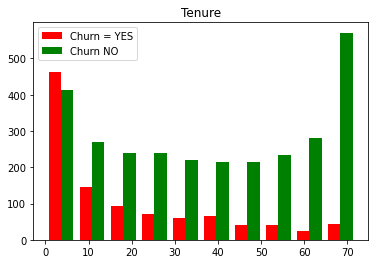

In [13]:
# numeric viz tenure
tenure = ex.tenure(train)

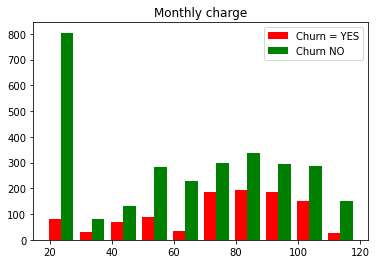

In [14]:
# numeric viz tenure monthly charge

monthly_charge = ex.mth_charge(train)

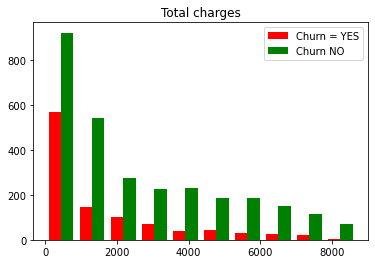

In [15]:
total_charge = ex.total_charge(train)

### Takeaways

- There is no Significant difference of churn between male and female 
- senior citizens churn at a higher rate than the rest of the population
- Cutomers with partners are less likely to churn than customers without partners 
- Customers with dependents are less likely to churn than customers without dependents
- Customers with phone service are more likely to churn
- Customers with multiple lines are more likely to churn
- Cutomers with online security are less likely to churn 
- Cutomers with online device protection and tech support are less likely to churn 
- Customers with TV streaming and movies are more likely to churn
- Customers with paperless billing are more likely to churn
- Customers with monthly contract are churning the most
- Customers with fiber internet are more likely to churn
- Customers with payment type as electronic check are more likely to churn
- Customers with Payment type sa credit card are less likely to churn
- Customers on a 2 years contract and one year contract are less likely to churn
- Customers with DSL lines are less likely to churn
- Customers with fiber are more likely to churn
- Customers with no internet are less likely to churn
- most churners are ealy on on their contract
- most people who churn have a higher monthly charges




### Bivariate Stats:


### Questions
- is the a correlation between monthly charges and total charges?
- is there a Relationship between churn and monthy charges?
- is there relation between churn and tenure?
- what can we discover about some categorical features and churn?


###  Hypotheses & statistical tests

- H0:  customer churn is independent of which payment type they use
- Ha:  customer churn has a dependent of which payment type they use 

 
- H0:  customer churn is independent of which contract type they have
- Ha:  customer churn has a dependent of which contract type they have

In [16]:
# i will use chi square testing because there are categorical variables
#- H0:  customer churn is independent of which payment type they use
#- Ha:  customer churn is not independent of which payment type they use 

observed = pd.crosstab(train.churn, train.payment_type)
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,730,717,725,725
1,149,135,595,167


In [17]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[730 717 725 725]
 [149 135 595 167]]
---
Expected

[[645 625 969 655]
 [233 226 350 236]]
---

chi^2 = 352.1238
p     = 0.0000


In [18]:
#Set our alpha
alpha = 0.05
if p < alpha:
    print(f" since p is {p} and is less than {alpha} We reject the hypothesis that customer churn is dependent on payment type")
else:
    print("We fail to reject the null hypothesis")

 since p is 5.1736284024122045e-76 and is less than 0.05 We reject the hypothesis that customer churn is dependent on payment type


In [19]:
# Hypotheses 2 
#- H0:  customer churn is independent of which contract type they have
#- Ha:  customer churn is not independent of which contract type they have
observed = pd.crosstab(train.churn, train.contract)
observed

contract,Month-to-month,One year,Two year
churn,,,
0,1234,723,940
1,928,84,34


In [20]:
# use stats.chi2_contingency test 
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1234  723  940]
 [ 928   84   34]]
---
Expected

[[1588  592  715]
 [ 573  214  258]]
---

chi^2 = 670.9607
p     = 0.0000


In [21]:
if p < alpha:
    print(f" since p is {p} and is less than {alpha} We reject the hypothesis that customer churn is dependent on payment type")
else:
    print("We fail to reject the null hypothesis")

 since p is 2.007869376861408e-146 and is less than 0.05 We reject the hypothesis that customer churn is dependent on payment type


### Bivariate visualization  

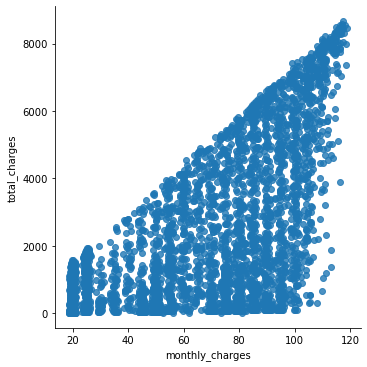

In [22]:
#lets visualize monthly charges and total charges
sns.lmplot(data =train, x= 'monthly_charges', y ='total_charges', fit_reg=False)

<function explore.bivariate_viz(df)>

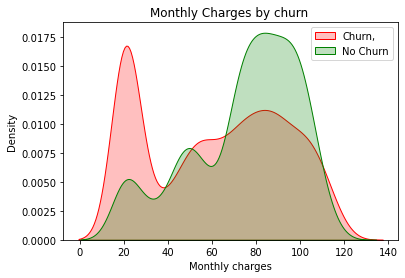

In [23]:
 #lets visualize monthly charges and churn with our predefine function bivariate_viz in explore.py file
ex.bivariate_viz(train)

<function explore.bivariate_viz2(df)>

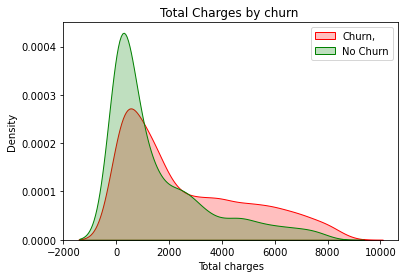

In [24]:
#lets visualize total charges and churn
ex.bivariate_viz2(train)

# Findings
- some customers churn with low monthly charges and some stay with are monthly charges
- churners seem to have lower total charges
- higher monthly charge, lower tenure and lower total charges are linked to High churn rate
- no online security, no tech support, month to month contract, fiber  and first year subscribers increase churn
- recent customers are more likely to churn

### Multivariate Stats:


<function explore.multivar1(df)>

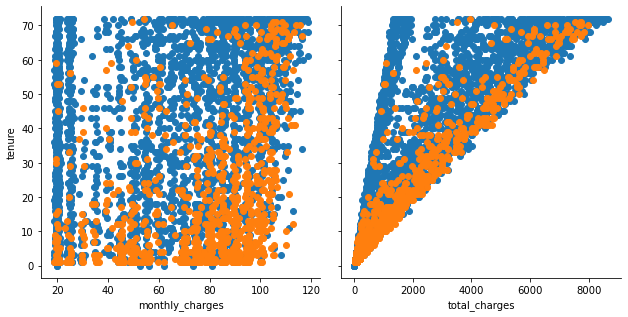

In [25]:
# multivariate visualization tenure, monthly charges, total charges and churn
ex.multivar1(train)
#a = sns.PairGrid(train, y_vars = ['tenure'], x_vars = ['monthly_charges','total_charges'], height=4.5, hue='churn')
#ax = a.map(plt.scatter)

### Correlation

<function explore.correlat(df)>

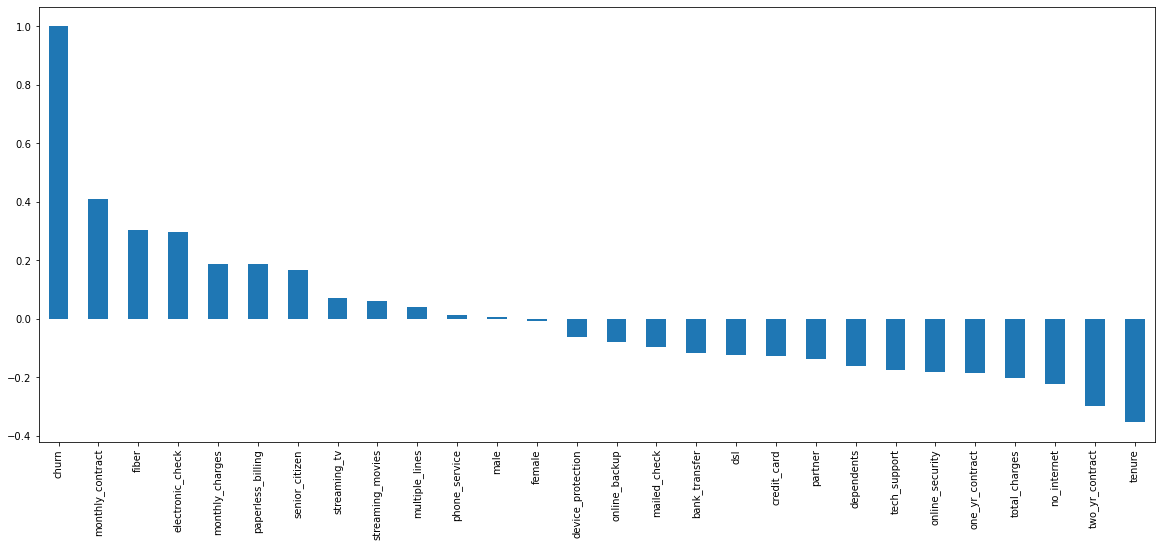

In [26]:
#lets call our predefined function for bar correlation 
ex.correlat(train)

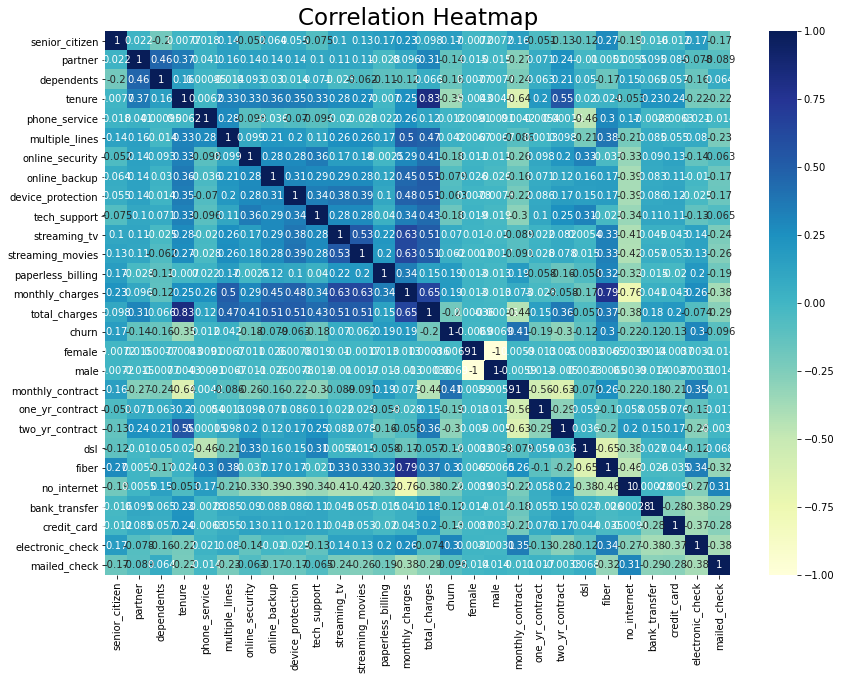

<function explore.correlat_heatmap(df)>

In [27]:
#lets call our predefined function for heatmap correlation 

ex.correlat_heatmap(train)


In [28]:
# lets find the driver of churn by correlation
traincorr = train.corr().sort_values(by='churn', ascending= False)
    
pd.DataFrame(traincorr.churn)

,churn
churn,1.000000
monthly_contract,0.409166
fiber,0.303591
electronic_check,0.298034
monthly_charges,0.189040
paperless_billing,0.187409
senior_citizen,0.165482
streaming_tv,0.069691
streaming_movies,0.062017
multiple_lines,0.041917


### Takeaways

- Total charges increase as monthly charges increases
- churn is high when monthly charge is high


In [29]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
5642,1982-FEBTD,Female,0,1,1,23,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3338,8982-NHAVY,Male,0,0,0,27,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4273,4115-NZRKS,Female,1,0,0,7,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2382,9633-DENPU,Female,0,1,0,47,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2655,5693-PIPCS,Male,0,0,0,41,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


## Modeling and Evaluation

- Plan ==> Acquire ==> Prepare ==> Explore ==> MODEL & EVALUATE ==> Deliver



### Baseline accuracy if we predict that no customer churns : 0.73
- Lets use all features to determine if the model performs better than the baseline

- lets drop some more columns since we already encoded our variables
- these columns were used for visualization purporses

In [30]:
X_train = train.drop(columns=['customer_id','churn','gender','internet','payment_type','contract'])
y_train = train.churn

X_validate = validate.drop(columns=['customer_id','churn','gender','internet','payment_type','contract'])
y_validate = validate.churn

X_test = test.drop(columns=['customer_id','churn','gender','internet','payment_type','contract'])
y_test = test.churn


In [31]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


### Decision Tree

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.760588,0.769367,-0.008779
1,3,0.792037,0.793613,-0.001577
2,4,0.795080,0.781786,0.013294
3,5,0.799391,0.782969,0.016423
4,6,0.815623,0.775872,0.039750


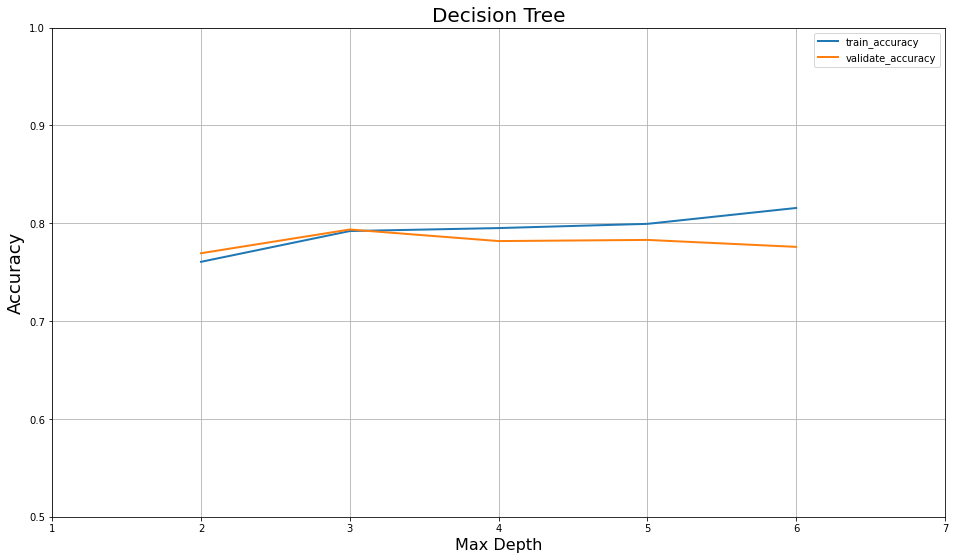

In [32]:
model.decision_tree(X_train, y_train, X_validate, y_validate, threshold=0.05, max_dep=25)

### Random Forest

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,2,2,0.768958,0.765819,0.003139
1,2,3,0.768958,0.765819,0.003139
2,2,4,0.768958,0.765819,0.003139
3,2,5,0.768958,0.765819,0.003139
4,2,6,0.768958,0.765819,0.003139
5,3,2,0.788486,0.791839,-0.003353
6,3,3,0.788486,0.791839,-0.003353
7,3,4,0.788486,0.791839,-0.003353
8,3,5,0.788486,0.791839,-0.003353
9,3,6,0.788740,0.791839,-0.003100


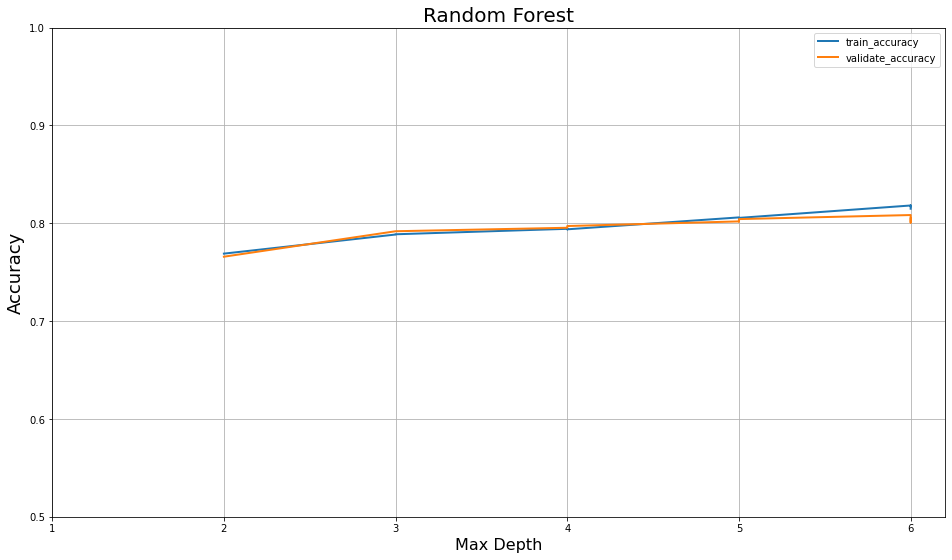

In [33]:
model.rand_forest(X_train, y_train, X_validate, y_validate, threshold=0.05, max_dep=7)

### KNN

 

,k,train_accuracy,validate_accuracy,difference
0,1,0.997464,0.704317,0.293147
1,2,0.855186,0.746895,0.108291
2,3,0.853411,0.738616,0.114795
3,4,0.830079,0.762862,0.067216
4,5,0.833376,0.755766,0.077610
5,6,0.825006,0.770550,0.054456
6,7,0.823485,0.767002,0.056483
7,8,0.819934,0.773507,0.046427
8,9,0.818920,0.767593,0.051326
9,10,0.813340,0.778829,0.034511


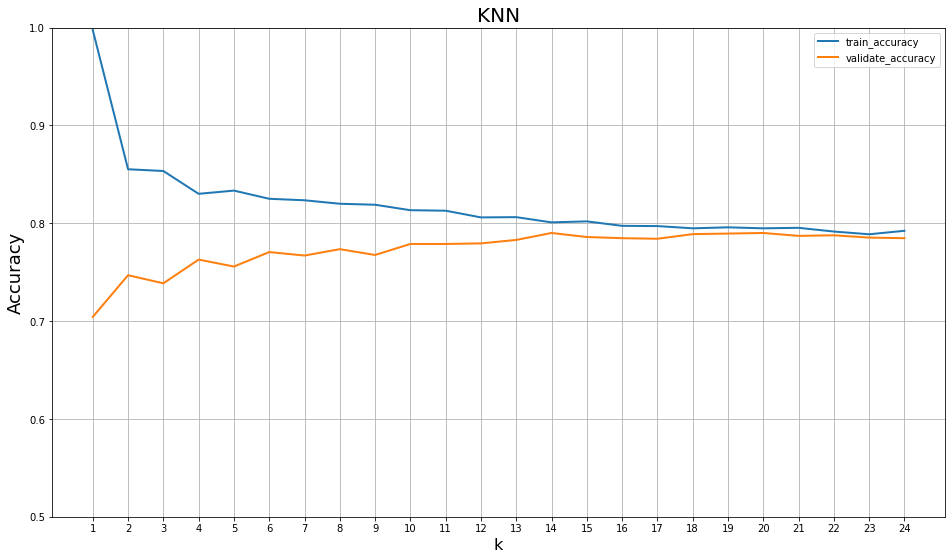

In [34]:
model.knn(X_train, y_train, X_validate, y_validate, max_k = 25)

# Evaluating Models


In [35]:
model.model_report()

,Model,Parameters,Train,Validate,Difference
0,DT,Max Depth = 3,0.792,0.794,-0.002
1,RF,Max Depth = 6 & Min Sample Leaf = 2,0.818,0.808,0.010
2,KNN,KNN = 19,0.796,0.789,0.007


#### Random forest is  our best Model In using all the features as hyparameters 

#### Trainning Our best model

In [37]:
model.best(X_train, y_train,y_train,X_train)

,0,1,accuracy,macro avg,weighted avg
precision,0.840838,0.720805,0.818159,0.780822,0.808996
recall,0.928202,0.513384,0.818159,0.720793,0.818159
f1-score,0.882363,0.599665,0.818159,0.741014,0.807369
support,2897.000000,1046.000000,0.818159,3943.000000,3943.000000


#### Model Validation on the Validate set

In [38]:
model.best(X_train, y_train,y_validate,X_validate)

,0,1,accuracy,macro avg,weighted avg
precision,0.835526,0.693498,0.808397,0.764512,0.797815
recall,0.920290,0.498886,0.808397,0.709588,0.808397
f1-score,0.875862,0.580311,0.808397,0.728086,0.797386
support,1242.000000,449.000000,0.808397,1691.000000,1691.000000


#### Model Test 


In [40]:
model.best(X_train, y_train,y_test,X_test)

,0,1,accuracy,macro avg,weighted avg
precision,0.838681,0.672474,0.804826,0.755577,0.794564
recall,0.909179,0.516043,0.804826,0.712611,0.804826
f1-score,0.872508,0.583964,0.804826,0.728236,0.795918
support,1035.000000,374.000000,0.804826,1409.000000,1409.000000


### Create CSV for Predictions


In [43]:
y_predict = model.best_churn_prediction(X_train, y_train, y_test, X_test)
output = X_test.copy()
output['y_predict'] = y_predict
output['churn'] = y_test
output.head(7)

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check,y_predict,churn
2789,0,0,0,72,1,1,1,1,1,1,...,1,0,1,0,1,0,0,0,0,0
1233,0,1,0,11,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6784,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3177,0,1,0,71,1,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1740,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
6304,0,0,0,17,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1760,0,1,1,43,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### output predictions to csv

In [44]:
output.to_csv('telco_churn_predictions.csv')

## Delivery
- Plan ==> Acquire ==> Prepare ==> Explore ==> Model & Evaluate ==> DELIVER


### Key Takeaways


- Customers with monthly contract are churning the most
- Customers with phone service are more likely to churn
- Customers with multiple lines are more likely to churn
- Cutomers with online security are less likely to churn
- most churners are ealy on on their contract
- most people who churn have a higher monthly charges

### Recommendations


- Offer incentives to convert to automatic payment plans
- Offer incentives to convert month-to-month customers to longer term customers
- Find out more about electronic check customers to determine if there are issues causing their churn


### Next Steps


 - Run more models and change the hyperparameters on several different versions
- Send a survey to customers who churn to get insight directly from the customer
- Continue further with feature engineering to run models on different features
- Fine tune the model by aiming to improve recall to catch all those that churned